# Análisis exploratorio de una base de datos de películas

Usa la base de datos `./data/imdb.csv`


### 1. Importar `pandas`, `matplotlib` y `numpy`

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Leer la base de datos del archivo csv a pandas

In [4]:
df = pd.read_csv('./data/imdb.csv')

### 3. Mostrar las  primeras y últimas filas del dataframe. Hacerlo con el valor default y pasando como argumento el número entero de filas que se deseen inspeccionar.

In [5]:
df.head()
df.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


### 4. Continúa inspeccionando el archivo viendo todas las columnas del dataframe

In [6]:
df.columns


Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

### 5. Imprime los primeros valores de la variable `Rank`

In [7]:
df['Rank'].head()

0    1
1    2
2    3
3    4
4    5
Name: Rank, dtype: int64

### 6. Demuestra que es mejor tener nombres de columnas sin espacios (notación corchetes y notación punto-variable).

In [13]:
df['Runtime (Minutes)'].head()
df['Revenue (Millions)'].head()

#no: 

df.Runtime (Minutes)


AttributeError: 'DataFrame' object has no attribute 'Runtime'

### 7. Renombra las columnas que tengan espacios

In [14]:
df.columns = (
    df.columns
    .str.replace(' ', '_')
    .str.replace('[()]', '', regex=True)
)

### 8. Utiliza tus nuevas columnas sin espacios :)

In [16]:
df.Runtime_Minutes.head()
df.Revenue_Millions.head()

0    333.13
1    126.46
2    138.12
3    270.32
4    325.02
Name: Revenue_Millions, dtype: float64

### 9. Visualiza la info de todo tu dataframe

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              1000 non-null   int64  
 1   Title             1000 non-null   object 
 2   Genre             1000 non-null   object 
 3   Description       1000 non-null   object 
 4   Director          1000 non-null   object 
 5   Actors            1000 non-null   object 
 6   Year              1000 non-null   int64  
 7   Runtime_Minutes   1000 non-null   int64  
 8   Rating            1000 non-null   float64
 9   Votes             1000 non-null   int64  
 10  Revenue_Millions  872 non-null    float64
 11  Metascore         936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


### 10. Inspecciona si hay columnas que tengan valores `NA`

In [18]:
df.isna().any()

Rank                False
Title               False
Genre               False
Description         False
Director            False
Actors              False
Year                False
Runtime_Minutes     False
Rating              False
Votes               False
Revenue_Millions     True
Metascore            True
dtype: bool

### 11. Imprime el número total de valores NA que haya en cada columna. Hazlo primero para la columna `Metascore` y después utiliza un ciclo for para hacerlo para todas las columnas

In [20]:
na_metascore = df['Metascore'].isna().sum()
print("Valores NA en Metascore:", na_metascore)

for col in df.columns:
    na_count = df[col].isna().sum()
    print(f"Valores NA en {col}: {na_count}")

Valores NA en Metascore: 64
Valores NA en Rank: 0
Valores NA en Title: 0
Valores NA en Genre: 0
Valores NA en Description: 0
Valores NA en Director: 0
Valores NA en Actors: 0
Valores NA en Year: 0
Valores NA en Runtime_Minutes: 0
Valores NA en Rating: 0
Valores NA en Votes: 0
Valores NA en Revenue_Millions: 128
Valores NA en Metascore: 64


### 12. Usa la magia de `dropna()`

In [21]:
df_sin_metascore_na = df.dropna(subset=['Metascore'])
print("Filas originales:", len(df))
print("Filas después de eliminar NA en Metascore:", len(df_sin_metascore_na))

Filas originales: 1000
Filas después de eliminar NA en Metascore: 936


### 13. Vuelve a ver la info del dataset

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              1000 non-null   int64  
 1   Title             1000 non-null   object 
 2   Genre             1000 non-null   object 
 3   Description       1000 non-null   object 
 4   Director          1000 non-null   object 
 5   Actors            1000 non-null   object 
 6   Year              1000 non-null   int64  
 7   Runtime_Minutes   1000 non-null   int64  
 8   Rating            1000 non-null   float64
 9   Votes             1000 non-null   int64  
 10  Revenue_Millions  872 non-null    float64
 11  Metascore         936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


### 14. Genera estadísticos descriptivos con el método `describe()`

In [23]:
df.describe()

,Rank,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### 15. Crea un histograma de la variable Metascore. Utiliza 10 cubetas

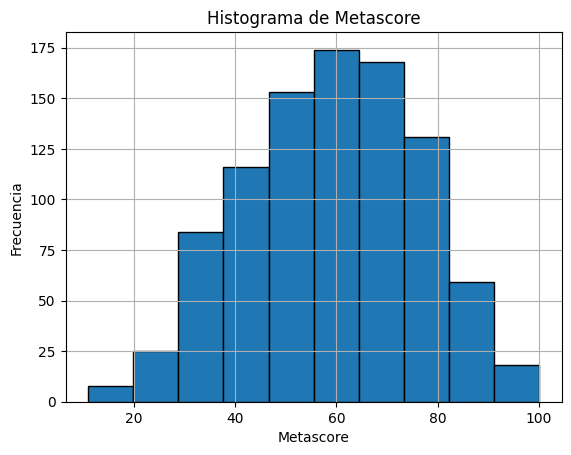

In [24]:
df['Metascore'].hist(bins=10, edgecolor='black')

plt.title("Histograma de Metascore")
plt.xlabel("Metascore")
plt.ylabel("Frecuencia")

plt.show()

### 16. Crea un histograma de la variable Rating. Utiliza 10 cubetas

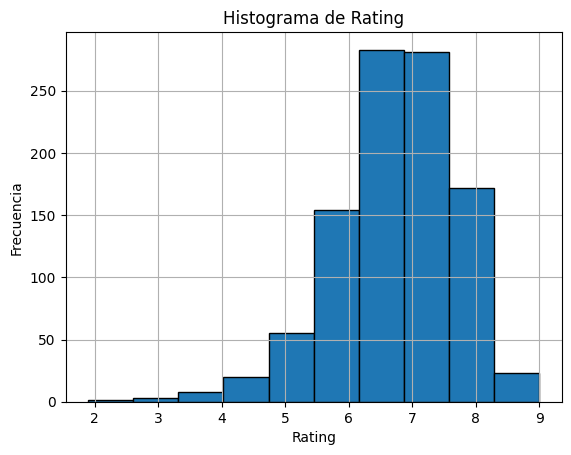

In [25]:
df['Rating'].hist(bins=10, edgecolor='black')

plt.title("Histograma de Rating")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

### 17. Vuelve a describir el dataframe y observa la media de la variable `Ratings`

In [26]:
df.describe()

,Rank,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### 18. Calcula este promedio con Numpy y después con un método de Pandas

In [28]:
promedio_numpy = np.mean(df['Metascore'])
print("Promedio usando NumPy:", promedio_numpy)

### pandas

promedio_pandas = df['Metascore'].mean()
print("Promedio usando pandas:", promedio_pandas)

Promedio usando NumPy: 58.98504273504273
Promedio usando pandas: 58.98504273504273


### 19. Obten los valores únicos de la variable Rating y después ordénalos de menor a mayor

In [30]:
valores_unicos = df['Rating'].unique()
valores_ordenados = sorted(valores_unicos)

print("Valores únicos de Rating ordenados:", valores_ordenados)

Valores únicos de Rating ordenados: [np.float64(1.9), np.float64(2.7), np.float64(3.2), np.float64(3.5), np.float64(3.7), np.float64(3.9), np.float64(4.0), np.float64(4.1), np.float64(4.2), np.float64(4.3), np.float64(4.4), np.float64(4.5), np.float64(4.6), np.float64(4.7), np.float64(4.8), np.float64(4.9), np.float64(5.0), np.float64(5.1), np.float64(5.2), np.float64(5.3), np.float64(5.4), np.float64(5.5), np.float64(5.6), np.float64(5.7), np.float64(5.8), np.float64(5.9), np.float64(6.0), np.float64(6.1), np.float64(6.2), np.float64(6.3), np.float64(6.4), np.float64(6.5), np.float64(6.6), np.float64(6.7), np.float64(6.8), np.float64(6.9), np.float64(7.0), np.float64(7.1), np.float64(7.2), np.float64(7.3), np.float64(7.4), np.float64(7.5), np.float64(7.6), np.float64(7.7), np.float64(7.8), np.float64(7.9), np.float64(8.0), np.float64(8.1), np.float64(8.2), np.float64(8.3), np.float64(8.4), np.float64(8.5), np.float64(8.6), np.float64(8.8), np.float64(9.0)]


### 20. Observa los ratings que te interesen y ahora filtra el dataframe con ese rating para ver cuáles son las películas con dicho rating

In [36]:
ratings_interes = [6.8, 7.4]
df_filtrado = df[(df['Rating'] >= 6.5) & (df['Rating'] <= 7.5)]
df_filtrado[['Rank', 'Title', 'Year', 'Rating']]

,Rank,Title,Year,Rating
1,2,Prometheus,2012,7.0
2,3,Split,2016,7.3
3,4,Sing,2016,7.2
8,9,The Lost City of Z,2016,7.1
9,10,Passengers,2016,7.0
...,...,...,...,...
984,985,Max,2015,6.8
988,989,Martyrs,2008,7.1
989,990,Selma,2014,7.5
990,991,Underworld: Rise of the Lycans,2009,6.6


### 21. Obten los valores únicos de la variable Rating y la frecuencia total de cada uno de estos valores. Posteriormente crea un nuevo dataframe con essos valores

In [37]:
frecuencias = df['Rating'].value_counts().sort_index()

print(frecuencias)

df_ratings = pd.DataFrame({
    'Rating': frecuencias.index,
    'Frecuencia': frecuencias.values
})

df_ratings

Rating
1.9     1
2.7     2
3.2     1
3.5     2
3.7     2
3.9     3
4.0     1
4.1     1
4.2     2
4.3     4
4.4     1
4.5     1
4.6     5
4.7     6
4.8     4
4.9     7
5.0     4
5.1     5
5.2    11
5.3    12
5.4    12
5.5    14
5.6    17
5.7    21
5.8    26
5.9    19
6.0    26
6.1    31
6.2    37
6.3    44
6.4    35
6.5    40
6.6    42
6.7    48
6.8    37
6.9    31
7.0    46
7.1    52
7.2    42
7.3    42
7.4    33
7.5    35
7.6    27
7.7    27
7.8    40
7.9    23
8.0    19
8.1    26
8.2    10
8.3     7
8.4     4
8.5     6
8.6     3
8.8     2
9.0     1
Name: count, dtype: int64


,Rating,Frecuencia
0,1.9,1
1,2.7,2
2,3.2,1
3,3.5,2
4,3.7,2
5,3.9,3
6,4.0,1
7,4.1,1
8,4.2,2
9,4.3,4


### 22. Ordena el nuevo dataframe por la variable `rating`

In [38]:
df_ratings_ordenado = df_ratings.sort_values(by='Rating')

df_ratings_ordenado

,Rating,Frecuencia
0,1.9,1
1,2.7,2
2,3.2,1
3,3.5,2
4,3.7,2
5,3.9,3
6,4.0,1
7,4.1,1
8,4.2,2
9,4.3,4


### 23. Crea una gráfica de barras con este nuevo dataframe ordenado

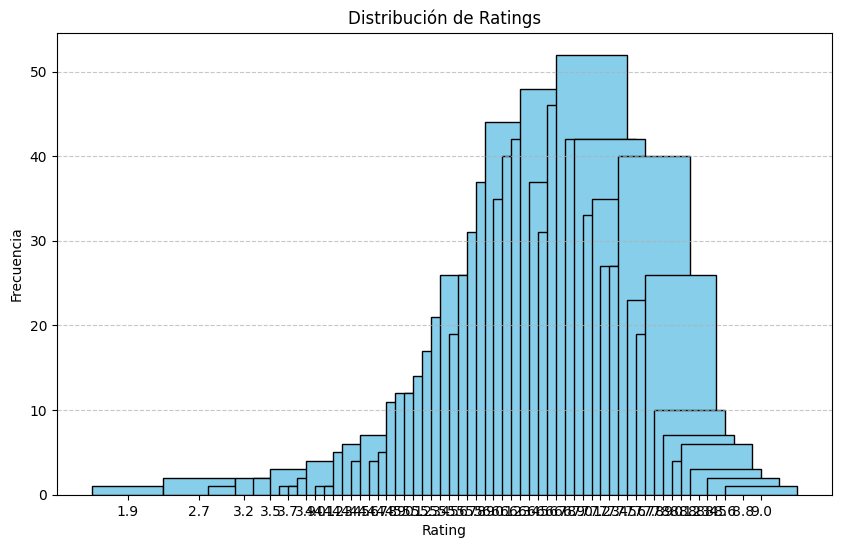

In [39]:
plt.figure(figsize=(10,6))
plt.bar(df_ratings_ordenado['Rating'], df_ratings_ordenado['Frecuencia'], color='skyblue', edgecolor='black')

plt.title("Distribución de Ratings")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.xticks(df_ratings_ordenado['Rating'])  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### 24. Crea la matriz de correlación del dataframe de películas

In [41]:
df_numerico = df.select_dtypes(include='number')

matriz_correlacion = df_numerico.corr()

matriz_correlacion

,Rank,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
Runtime_Minutes,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
Revenue_Millions,-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


### 25. Grafica la matriz de correlación utilizando `matshow()`

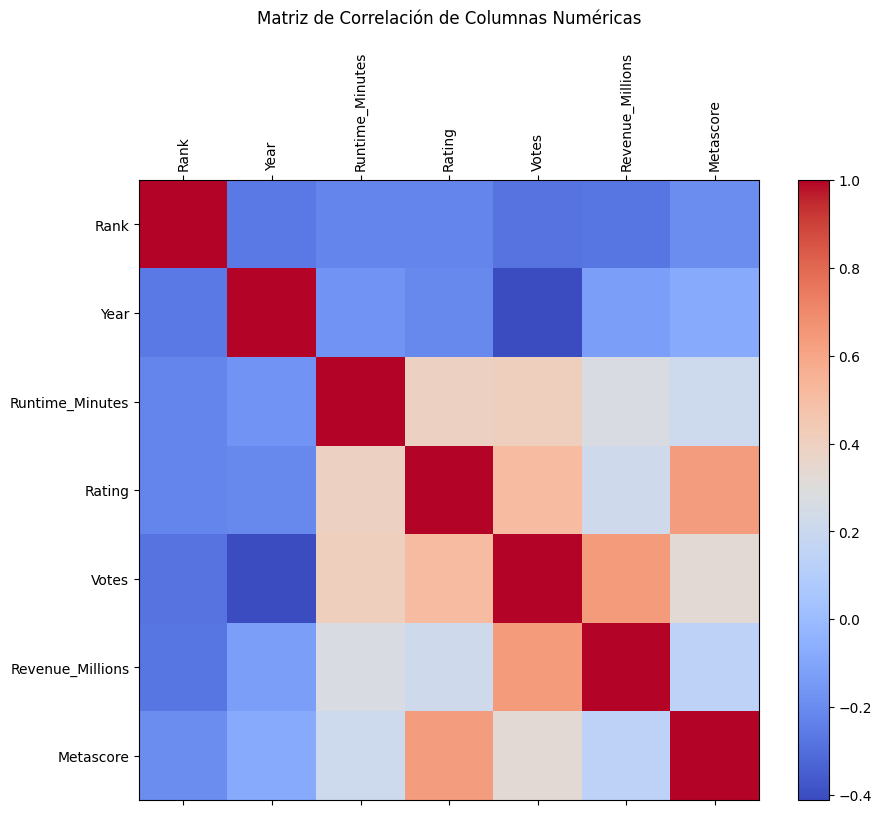

In [42]:
plt.figure(figsize=(10,8))
plt.matshow(matriz_correlacion, fignum=1, cmap='coolwarm')  
plt.colorbar() 

plt.xticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns, rotation=90)
plt.yticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns)

plt.title("Matriz de Correlación de Columnas Numéricas", pad=20)
plt.show()